In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mpl_toolkits import mplot3d

In [2]:
fomc = pd.read_pickle('../data/fomc_data.pkl')
fomc.head(3)

,minutes_paragraphs,paragraphs_length,minutes_text,text_length,doc2bow,topic_prob,topic_score,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
1993-02-03,"[[meeting, federal, open, market, committee, h...","[14, 15, 24, 29, 12, 32, 37, 32, 14, 16, 82, 5...",meeting federal open market committee hold off...,4439,"[[(11, 1), (19, 1), (36, 1), (95, 1), (101, 1)...","[[(0, 0.0355354), (1, 0.03572677), (2, 0.03560...","{0: 0.021366667665002392, 1: 0.249447004654740...",0.021367,0.249447,0.285857,0.090774,0.317260,0.035295
1993-03-23,"[[meeting, federal, open, market, committee, h...","[12, 13, 64, 23, 24, 28, 60, 51, 64, 56, 100, ...",meeting federal open market committee hold off...,2790,"[[(11, 1), (19, 1), (95, 1), (101, 1), (104, 1...","[[(0, 0.037205704), (1, 0.037428558), (2, 0.03...","{0: 0.019202716032370233, 1: 0.071072938151016...",0.019203,0.071073,0.389107,0.092606,0.405465,0.022546
1993-05-18,"[[meeting, federal, open, market, committee, h...","[12, 26, 19, 25, 27, 62, 46, 54, 37, 89, 56, 6...",meeting federal open market committee hold off...,2355,"[[(11, 1), (19, 1), (95, 1), (101, 1), (104, 1...","[[(0, 0.037205707), (1, 0.03742828), (2, 0.037...","{0: 0.020222202738284303, 1: 0.059072659757075...",0.020222,0.059073,0.359664,0.106950,0.429907,0.024184


In [3]:
fomcwordcloud = [word for minute in fomc['minutes_paragraphs'] for val in minute for word in val]

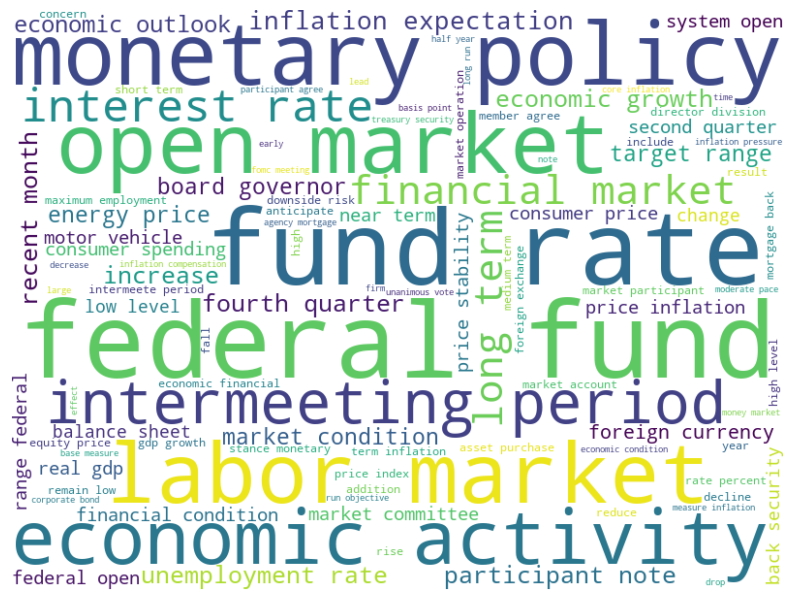

In [4]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(
    background_color="white",  # Set the background color
    colormap="viridis",  # Choose a colormap for the colors of the words
    width=800, height=600,  # Set the size of the word cloud canvas
    max_words=100,  # Limit the maximum number of words shown in the cloud
    contour_color='steelblue',  # Set the color for word cloud contour lines
    contour_width=3,  # Set the width of contour lines
).generate(','.join(fomcwordcloud)) # NB. 'join' method used to convert the documents list to text format
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
bow = pd.DataFrame(Counter(fomcwordcloud).items(), columns=['Word', 'Frequency'])
bow.sort_values('Frequency', ascending=False).head(5)

,Word,Frequency
3,market,12021
152,rate,11320
404,inflation,10569
4,committee,10256
366,economic,8500
